Load and Inspect Data

In [27]:
import pandas as pd

df = pd.read_csv(r"C:\Users\nehab\Downloads\archive\AB_NYC_2019.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Create SQLite DB and Load Data

In [28]:
import sqlite3

conn = sqlite3.connect('airbnb_nyc.db')
df.to_sql('airbnb_data', conn, if_exists='replace', index=False)


48895

Clean the Data in python

In [29]:
df = df[df['price'] > 0]                    
df = df[df['minimum_nights'] < 30]         
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


Use SQL to Extract Data

In [39]:
query = """
SELECT neighbourhood_group, AVG(price) as avg_price
FROM airbnb_data
WHERE price > 0 AND minimum_nights < 30
GROUP BY neighbourhood_group
"""

borough_price_df = pd.read_sql_query(query, conn)


In [40]:
query = """
SELECT room_type, 
       AVG(price) AS avg_price
FROM airbnb_data
WHERE price > 0
GROUP BY room_type;
"""

avg_price_df = pd.read_sql_query(query, conn)



Visualize Insights in Python

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

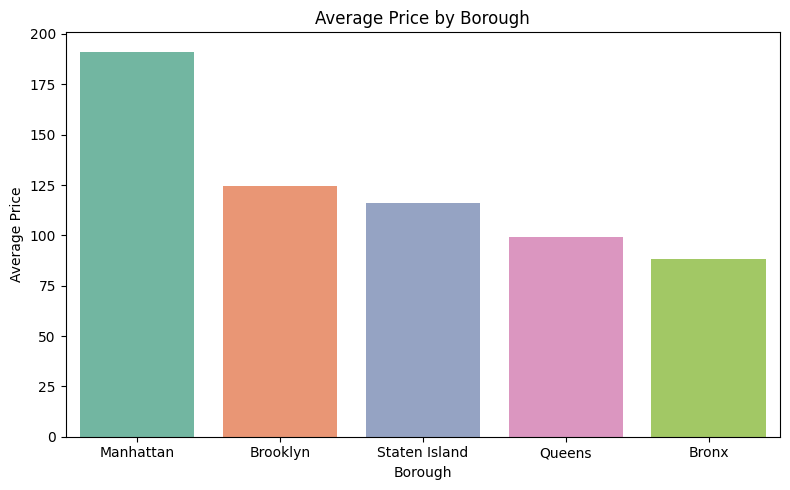

In [47]:
borough_price_df = borough_price_df.sort_values(by='avg_price', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=borough_price_df, x='neighbourhood_group', y='avg_price',hue='neighbourhood_group',palette='Set2',legend=False)
plt.title("Average Price by Borough")
plt.xlabel("Borough")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

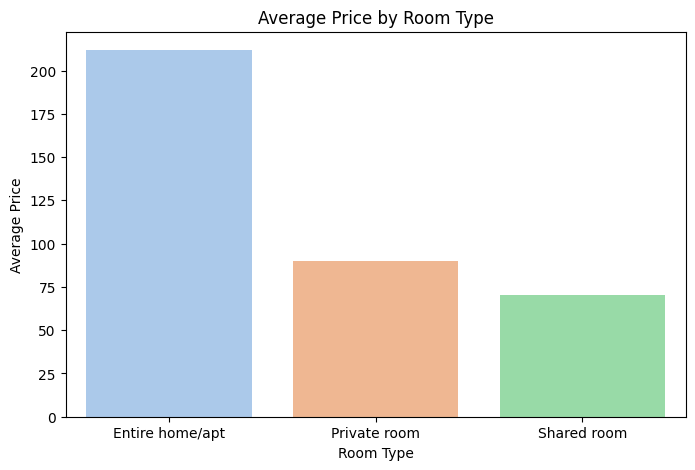

In [48]:
avg_price_df = avg_price_df.sort_values(by='avg_price', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price_df, x='room_type', y='avg_price',hue='room_type',palette='pastel',legend=False)

plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price")
plt.show()


In [49]:
availability_bins = pd.cut(df['availability_365'],
                           bins=[-1, 0, 90, 180, 365],
                           labels=['0 (Not Available)', '1–90', '91–180', '181–365'])


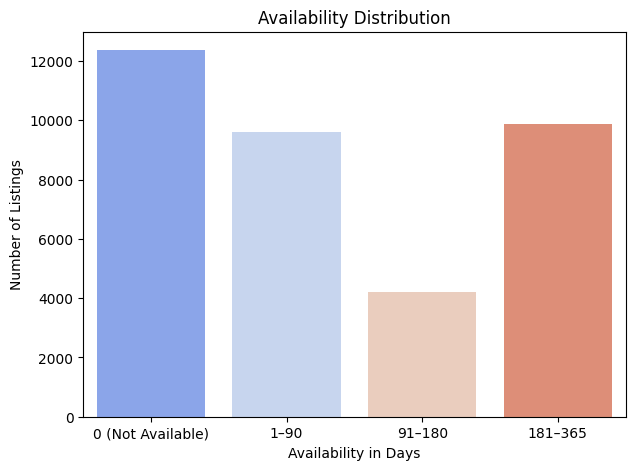

In [50]:
plt.figure(figsize=(7, 5))
sns.countplot(x=availability_bins,hue=availability_bins, palette='coolwarm',legend=False)
plt.title('Availability Distribution')
plt.xlabel('Availability in Days')
plt.ylabel('Number of Listings')
plt.show()

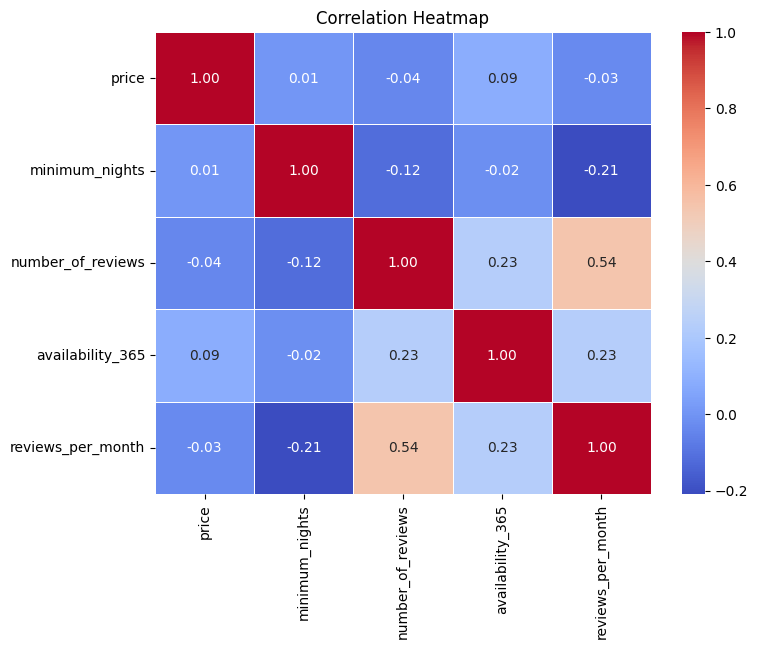

In [51]:
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365', 'reviews_per_month']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


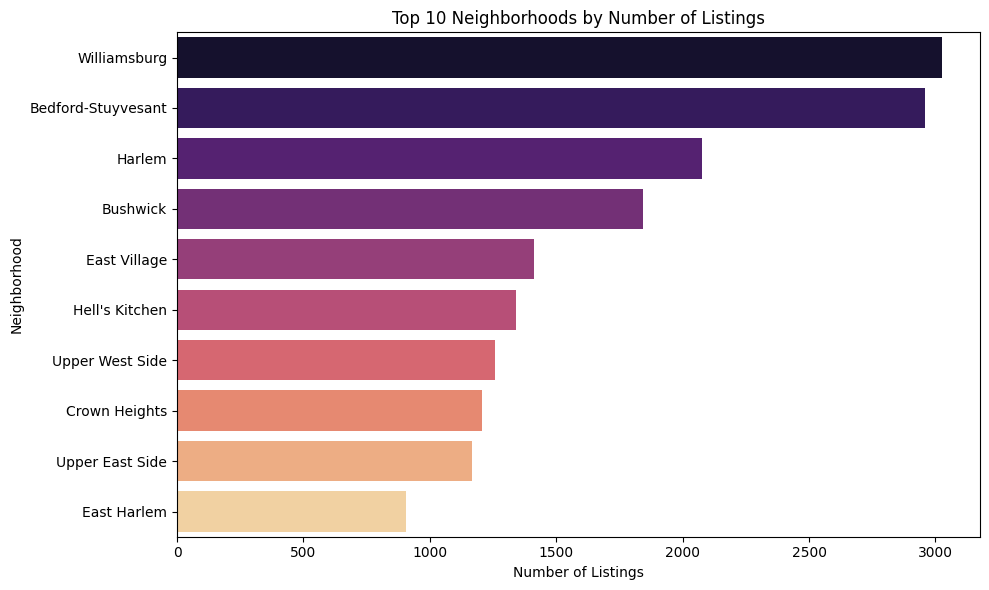

In [52]:
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(10)
top_neighbourhoods.index = top_neighbourhoods.index.astype(str)  

plt.figure(figsize=(10,6))
sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index,hue=top_neighbourhoods.index,palette='magma',legend=False)
plt.title("Top 10 Neighborhoods by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()

